In [5]:
import os
%pwd
os.chdir('../')

In [6]:
%pwd

'c:\\Users\\Prarthana\\Desktop\\projects\\energy'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
df = pd.read_csv('energy_data_set.csv')

In [16]:
print(df.head())

                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.72333

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [19]:
print(df.isnull().sum())

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

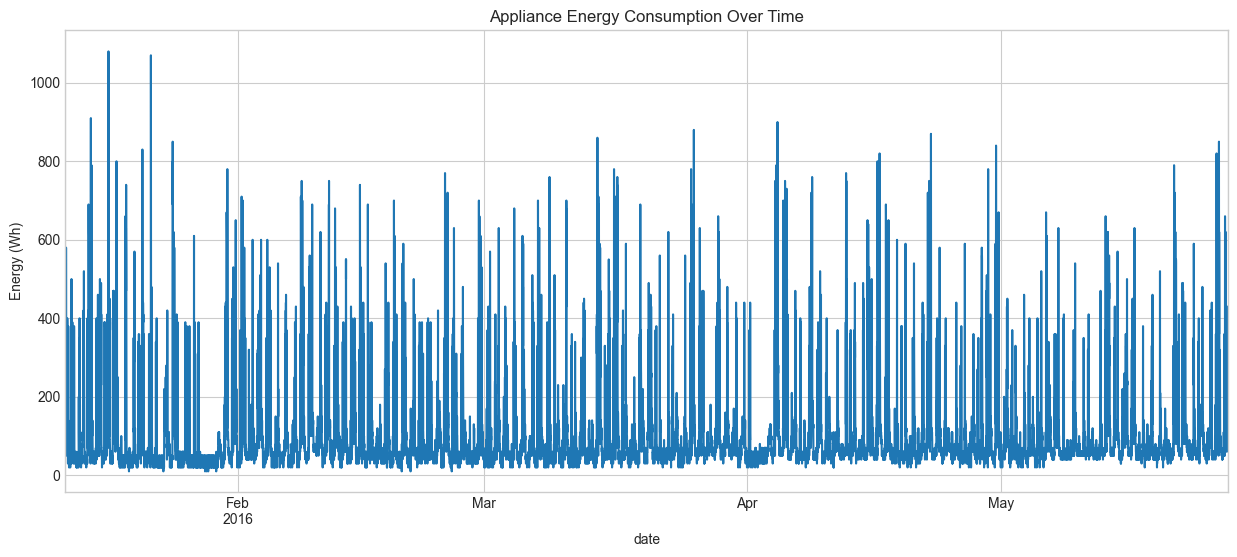

In [10]:
plt.figure(figsize=(15, 6))
df['Appliances'].plot(title='Appliance Energy Consumption Over Time')
plt.ylabel('Energy (Wh)')
plt.show()

In [21]:
print("\n=== Date Analysis ===")
print("\nDate Range:")
print("Start Date:", df.index.min())
print("End Date:", df.index.max())


=== Date Analysis ===

Date Range:
Start Date: 2016-01-11 17:00:00
End Date: 2016-05-27 18:00:00


In [22]:
print("\n=== Time Series Analysis ===")
print("\nDaily Energy Consumption Pattern:")
print(df['Appliances'].resample('D').mean().describe())


=== Time Series Analysis ===

Daily Energy Consumption Pattern:
count    138.000000
mean      97.963041
std       30.470787
min       37.500000
25%       75.572917
50%       92.708333
75%      113.298611
max      188.541667
Name: Appliances, dtype: float64


In [26]:
correlation = df.corr()
print("\n=== Correlation Analysis ===")
print("\nTop 5 Correlations with Appliances:")
print(correlation['Appliances'].abs().sort_values(ascending=False).head(6))


=== Correlation Analysis ===

Top 5 Correlations with Appliances:
Appliances    1.000000
lights        0.197278
RH_out        0.152282
T2            0.120073
T6            0.117638
T_out         0.099155
Name: Appliances, dtype: float64


C:\Users\Prarthana\AppData\Local\Temp\ipykernel_36336\244475002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


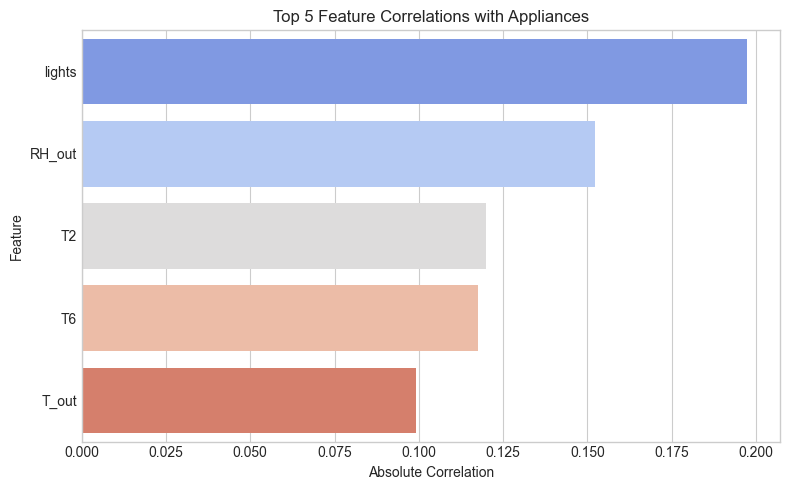

In [31]:
correlation = df.corr()
# Top 5 correlations with 'Appliances' (excluding self-correlation)
top_corr = correlation['Appliances'].abs().sort_values(ascending=False).head(6)[1:]

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Top 5 Feature Correlations with Appliances')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

C:\Users\Prarthana\AppData\Local\Temp\ipykernel_36336\20695982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_signed.values, y=top_corr_signed.index, palette='coolwarm')


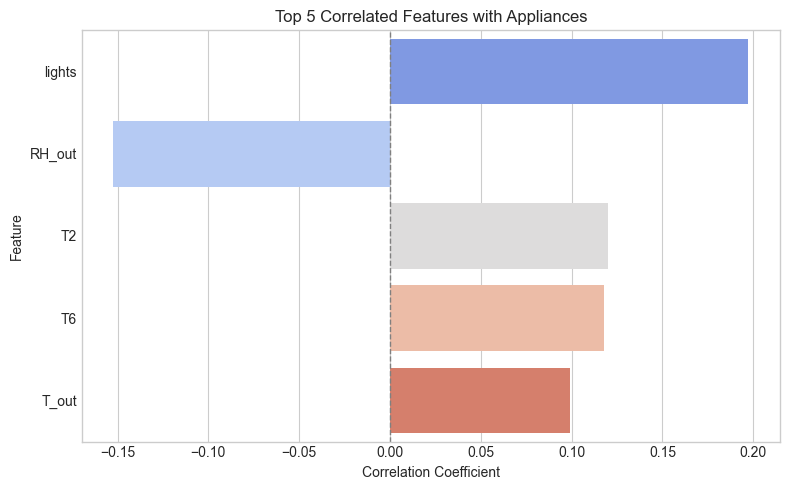

In [28]:
correlation = df.corr()

top_n = 5 
top_corr = correlation['Appliances'].abs().sort_values(ascending=False).head(top_n + 1)[1:]
top_corr_signed = correlation['Appliances'][top_corr.index]

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr_signed.values, y=top_corr_signed.index, palette='coolwarm')
plt.title(f'Top {top_n} Correlated Features with Appliances')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

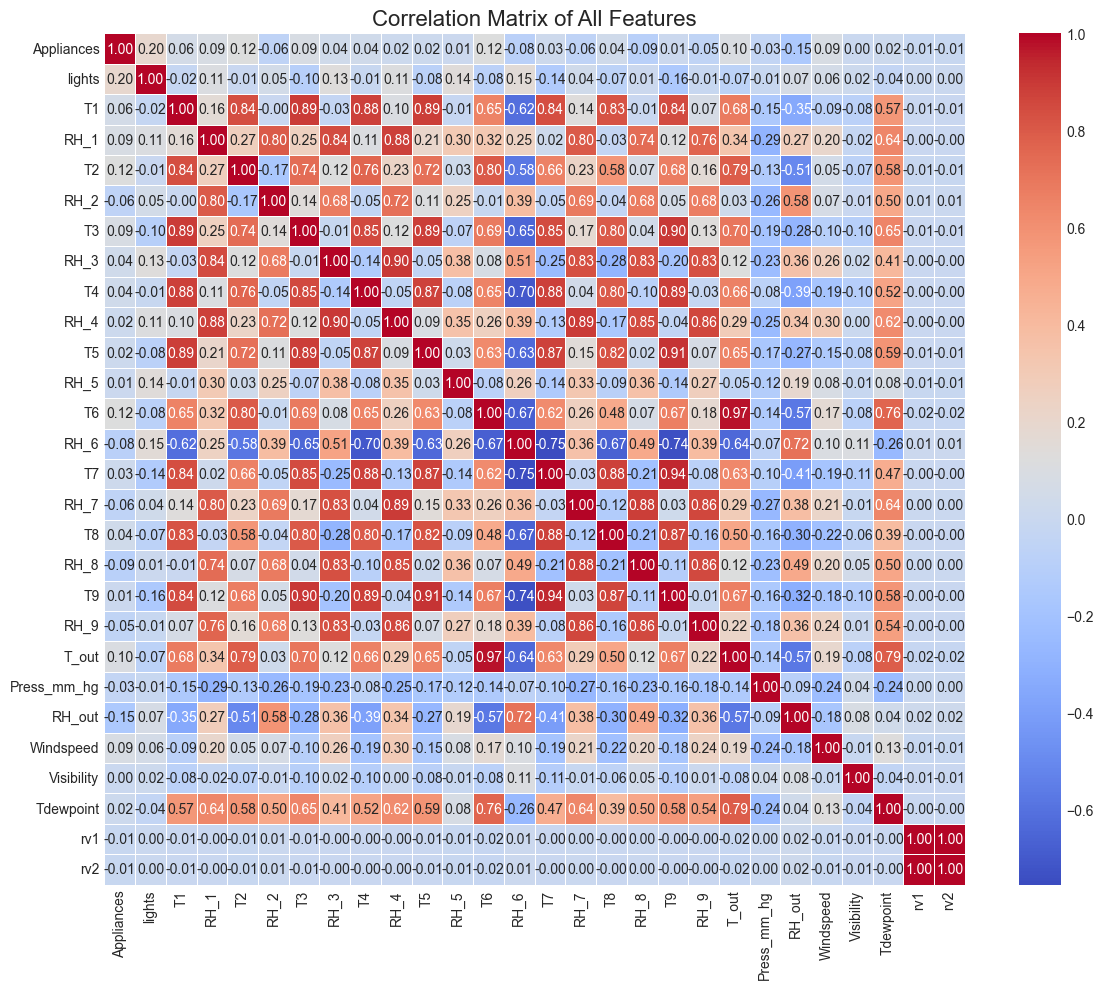

In [35]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of All Features", fontsize=16)
plt.tight_layout()
plt.savefig('plots/correlation_matrix.png')
plt.show()


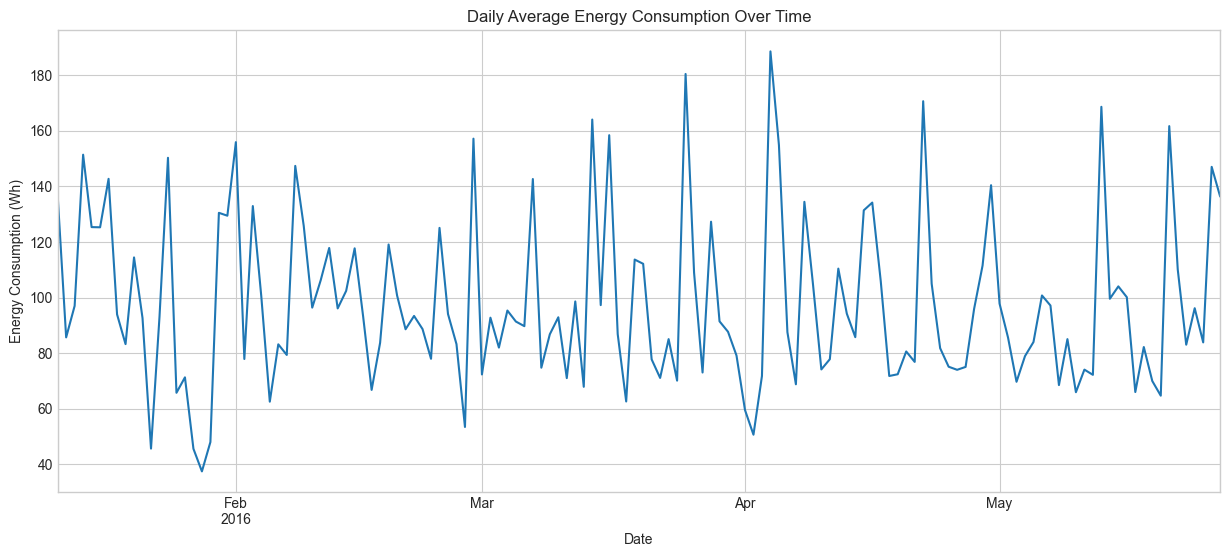

In [36]:
plt.figure(figsize=(15, 6))
df['Appliances'].resample('D').mean().plot()
plt.title('Daily Average Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.savefig('plots/energy_consumption_over_time.png')
plt.show()


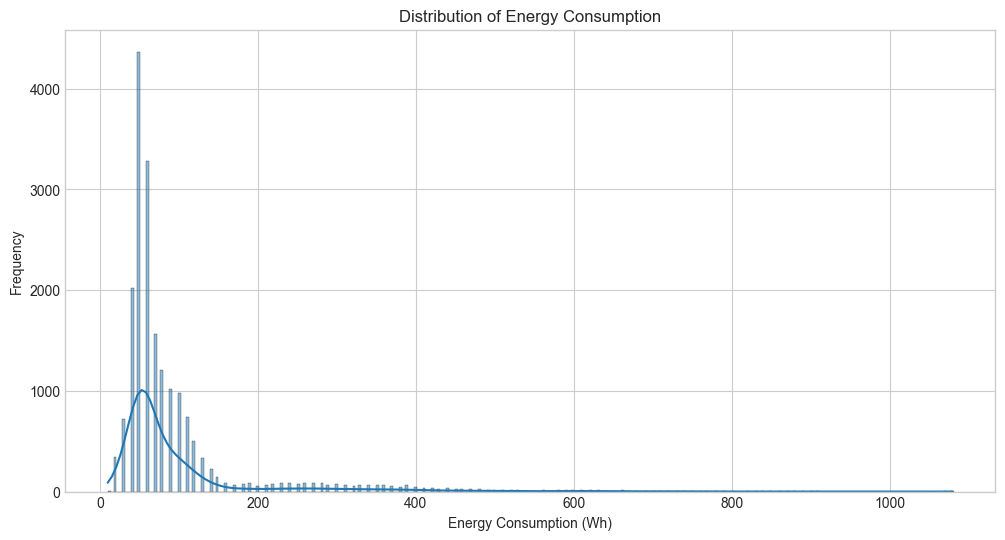

In [38]:
# Energy Consumption Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.savefig('plots/energy_consumption_distribution.png')
plt.show()
#plt.close()


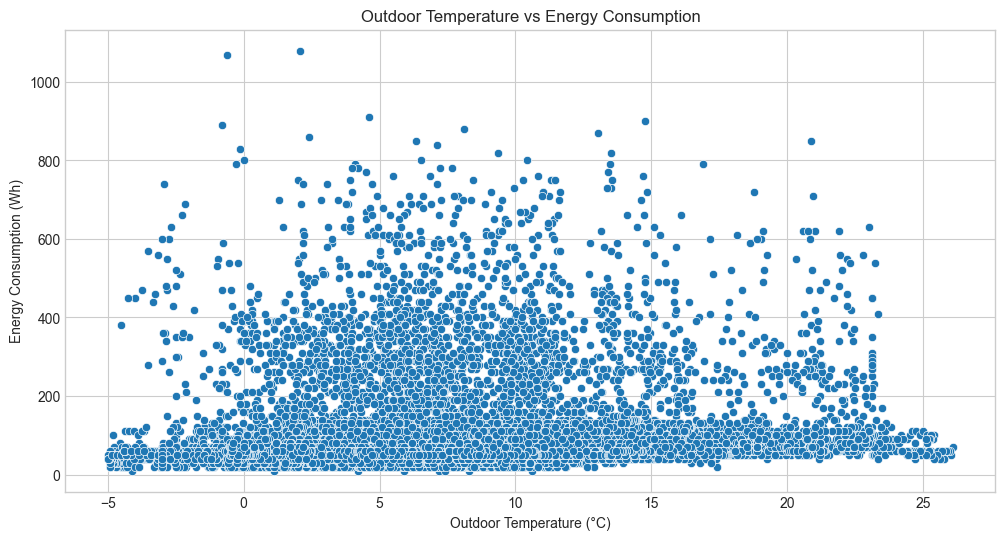

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='T_out', y='Appliances', data=df)
plt.title('Outdoor Temperature vs Energy Consumption')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.savefig('plots/temp_vs_energy.png')
plt.show()


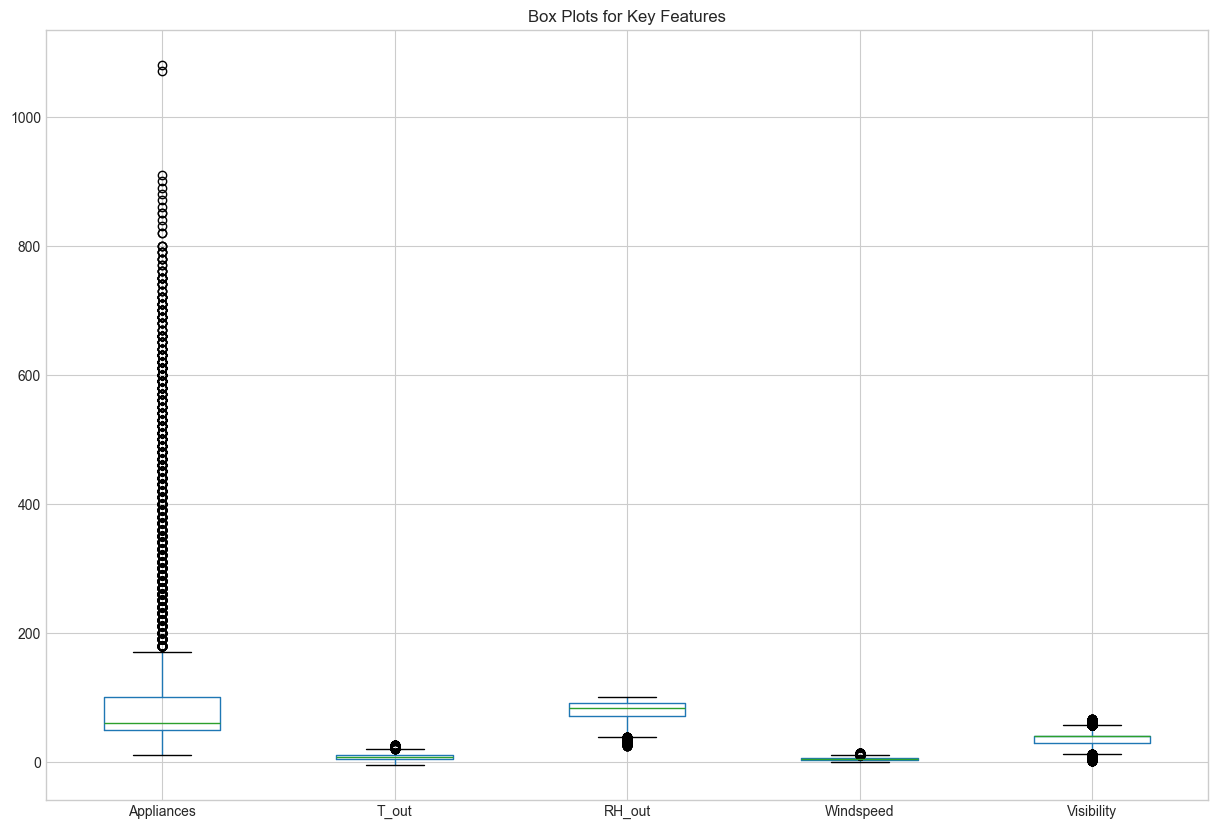

In [40]:
#Box Plots for Outlier Detection
plt.figure(figsize=(15, 10))
df.boxplot(column=['Appliances', 'T_out', 'RH_out', 'Windspeed', 'Visibility'])
plt.title('Box Plots for Key Features')
plt.savefig('plots/boxplots.png')
plt.show()

In [41]:
# Seasonal Pattern Analysis
# Create new date features
df['hour'] = df.index.hour
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

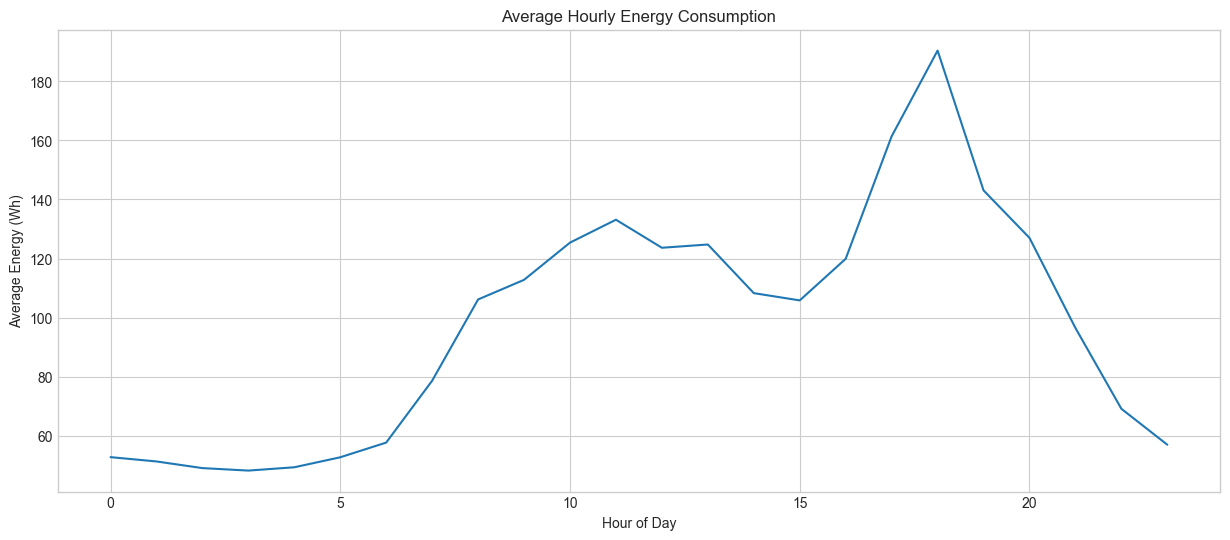

In [42]:
# Hourly energy consumption pattern
plt.figure(figsize=(15, 6))
sns.lineplot(data=df.groupby('hour')['Appliances'].mean())
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy (Wh)')
plt.savefig('plots/energy_consumption_over_time.png')
plt.show()

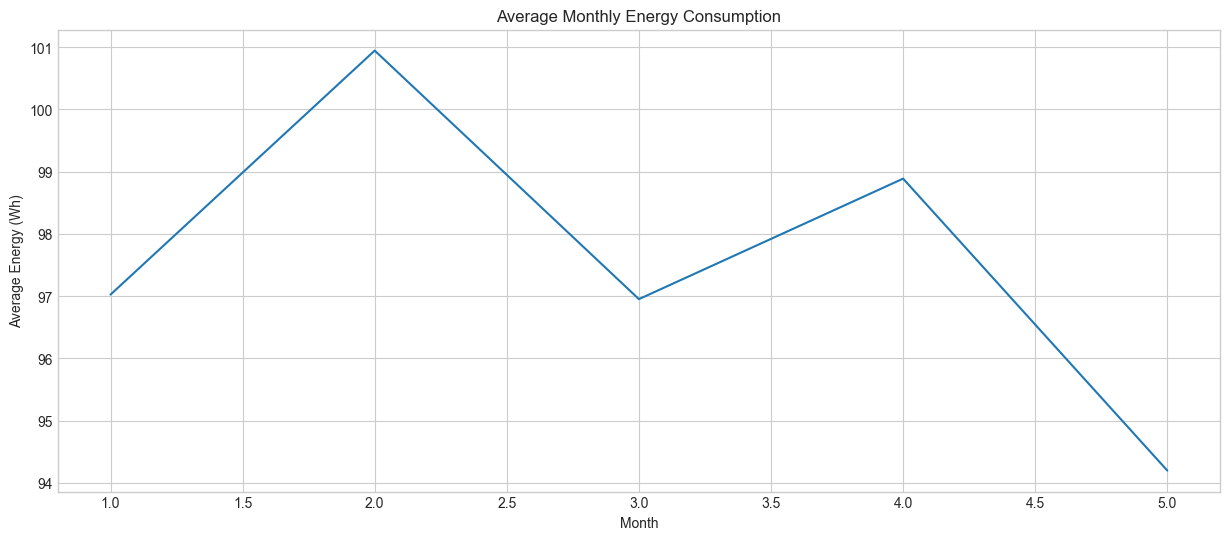

In [43]:
# Monthly energy consumption pattern
plt.figure(figsize=(15, 6))
sns.lineplot(data=df.groupby('month')['Appliances'].mean())
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Energy (Wh)')
plt.savefig('plots/average_monthly_energy.png')
plt.show()

In [44]:
#Outlier Detection using Z-score
from scipy import stats
z_scores = stats.zscore(df[['Appliances', 'T_out', 'RH_out', 'Windspeed', 'Visibility']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 858


In [ ]:
#####

In [45]:
# --- Drop Useless Columns ---
# rv1 and rv2 are random variables and not useful
df_processed = df.drop(columns=['rv1', 'rv2'])

# --- Log Transform the Target Variable ---
#skewness of the target variable
df_processed['Appliances'] = np.log1p(df_processed['Appliances'])

print("Dropped 'rv1', 'rv2' and applied log transformation to 'Appliances'.")

Dropped 'rv1', 'rv2' and applied log transformation to 'Appliances'.


In [46]:
# --- Create Time-Based Features ---
df_processed['hour'] = df_processed.index.hour
df_processed['day_of_week'] = df_processed.index.dayofweek
df_processed['month'] = df_processed.index.month

# --- Create Lagged Features for the Target ---
df_processed['appliances_lag_1h'] = df['Appliances'].shift(6) # 1 hour ago (6 * 10 mins)
df_processed['appliances_lag_2h'] = df['Appliances'].shift(12) # 2 hours ago

# --- Create Rolling Window Features ---
# Use rolling features from important variables like outdoor temperature and the target
df_processed['T_out_rolling_mean_1h'] = df_processed['T_out'].rolling(window=6).mean()
df_processed['appliances_rolling_mean_1h'] = df['Appliances'].rolling(window=6).mean()

# --- Drop NaN values created by shift() and rolling() ---
df_processed.dropna(inplace=True)

print("\nFeature engineering complete. New shape:", df_processed.shape)
print(df_processed.head())


Feature engineering complete. New shape: (19723, 34)
                     Appliances  lights         T1       RH_1         T2  \
date                                                                       
2016-01-11 19:00:00    6.066108      50  20.133333  48.000000  19.566667   
2016-01-11 19:10:00    5.525453      40  20.260000  52.726667  19.730000   
2016-01-11 19:20:00    4.615121      10  20.426667  55.893333  19.856667   
2016-01-11 19:30:00    4.615121      10  20.566667  53.893333  20.033333   
2016-01-11 19:40:00    4.510860      10  20.730000  52.660000  20.166667   

                          RH_2         T3       RH_3         T4       RH_4  \
date                                                                         
2016-01-11 19:00:00  44.400000  19.890000  44.900000  19.000000  46.363333   
2016-01-11 19:10:00  45.100000  19.890000  45.493333  19.000000  47.223333   
2016-01-11 19:20:00  45.833333  20.033333  47.526667  19.000000  48.696667   
2016-01-11 19:30:00  46